In [1]:
os.getcwdb()
sys.path.append('D:\Estudio\WorkBenchs\My_projects\MyLibrary')

In [2]:
import instaloader
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_bokeh
pandas_bokeh.output_notebook()
import numpy as np
import datetime
import pandas_module as pm
from wordcloud import WordCloud
from nltk.corpus import stopwords
import time
import ipywidgets as widgets
import random

Loading BokehJS ...

Clase para buscar hasta n hashtags relacionados con tu nicho

In [41]:
class Niche():
    """This class creates a bot for istagram
    """    

    def __init__(self):
        """Init method of the class
        """
        #Create an instance
        self.L = instaloader.Instaloader()
        #other attributs
        self.hash_df = pd.DataFrame(columns = ['hashtag', 'mediacount', 'group'])
        self.top_influencers = []
        #a list with all the discarded hashtags on the process
        self.discarded_list = []


        self.df = pd.DataFrame(columns = ['hashtag', 'owner', 'post']) #??????
         
        #groups
        self.small = False
        self.medium = False
        self.big = False

        #final strategy
        self.strategy = []
    
    def hashtags_search(self, size, key_words):
        """
           This function scratch for "size" hashtags related with the given niche

           Arguments:
               key_words {list} -- [the key_words of the nich] 
        """
        #Get top influencers of the niche
        top = []
        for word in key_words:
            top.append(instaloader.TopSearchResults(self.L.context, word))

        for t in top:
            self.top_influencers = self.top_influencers + list(t.get_profiles())
        self.top_influencers = list(set(self.top_influencers)) #crea una lista unica de los top influencers
        
        #actualizar diccionario con los profiles + los genradores de posts
        post_dict = {}
        for x in self.top_influencers:
            #check limits in each loop
            if len(self.hash_df) >= size:
                break            
            post_dict[x] = x.get_posts()


        #start        
        for inf in post_dict.items(): #recorre el diccionario de influencers + sus posts
            #check limits in each loop
            if len(self.hash_df) >= size:
                break
            for post in inf[1]:
                caption_hashtags = post.caption_hashtags
                #get the news hashtags that arent in the df and filter in stair function
                self.stairs(new_data = self.get_news(caption_hashtags), size = size, inf = inf)
                break


    def stairs(self, new_data, size, inf):
        """
            This function apply the stair strategie to a list of hashtags and divide them in 3 groups:
            group1 = 5k to 50k (50%) small
            group2 = 50k to 500k (30%) medium
            group3 = + 500k (20%) big
             Arguments:
            new_data {list} -- [list of related new hashtags]
        """        
        for x in new_data: # x is a single hashtag, new_data is a list of hashtag objects
            self.printstatus(x = x, influencer = inf)
            x = instaloader.Hashtag.from_name(self.L.context, x)
            mediacount = x.mediacount

            if not self.small and mediacount >= 5000 and mediacount <= 50000:
                #print('g1-{}'.format(x)) ---debug
                #append to dataFeame
                self.hash_df.loc[len(self.hash_df)] = [
                    x, mediacount, 
                    "small"
                    ]
                #chek size
                if len(self.hash_df[self.hash_df.group == "small"]) >= size*0.5:
                    self.small = True

            elif not self.medium and mediacount > 50000 and mediacount <= 500000:
                #print('g2-{}'.format(x)) ---debug
                #append to dataFeame
                self.hash_df.loc[len(self.hash_df)] = [
                    x, mediacount, 
                    "medium"
                    ]
                #chek size
                if len(self.hash_df[self.hash_df.group == "medium"]) >= size*0.3:
                    self.medium = True

            elif not self.big and mediacount > 500000:
                #print('g3-{}'.format(x)) ---debug
                #append to dataFeame
                self.hash_df.loc[len(self.hash_df)] = [
                    x, mediacount, 
                    "big"
                    ]
                #chek size
                if len(self.hash_df[self.hash_df.group == "big"]) >= size*0.2:
                    self.big = True
             
            else:
               #create a discarted list in order to optimise
               self.discarded_list.append(x)  
            
            #check limits
            if self.hash_df.shape[0] >= size:
                self.printstatus(x = x)
                print("done")
                break
    
    def get_news(self, caption_hashtags): 
        '''
            This function compares with the testtests hashtags and return just the new ones
        '''
        used = self.hash_df['hashtag'].tolist() + self.discarded_list
        return list(set(caption_hashtags) - set(used))

    def hashtags_search_by_top(self, size, keywords):
        #iterate keywords
        for h in keywords:
            h_class = instaloader.Hashtag.from_name(self.L.context, h)
            top_post_gen = h_class.get_top_posts()
            for post in top_post_gen:
                post.get_           
            h.get_top_posts() 
    
    #def chek_top_status():
        #if self.strategy:
    
    def write_strategy(self, number):
        #divide
        rang1 = self.hash_df.name[self.hash_df["group"] == "small"]
        rang2 = self.hash_df.name[self.hash_df["group"] == "medium"]
        rang3 = self.hash_df.name[self.hash_df["group"] == "big"]
        #get samples
        self.strategy = (rang1.sample(round(number*0.5)).tolist() + rang2.sample(round(number*0.3)).tolist() + rang3.sample(round(number*0.2)).tolist())
        #self.strategy.append("idiliodigital")
        print(self.strategy)

        with open('strategy_list.txt', 'w', encoding='utf-8') as f:
            f.truncate(0)
            for item in self.strategy:
                f.write("#%s," % item)
        return self.strategy
    
    def printstatus(self, x, influencer):
        df_count = self.hash_df.groupby("group").count()["hashtag"]
        df_count.name = None
        clear_output()
        print("influencer---> {}".format(influencer))
        print("analizing---> {}".format(x)) #--debug
        print("*****Status*****")
        #print(df_count)
        if len(df_count)>0:
            print('Big-----', df_count.values[0])
        if len(df_count)>1:
            print('Medium--', df_count.values[1])
        if len(df_count)>2:
            print('Small---', df_count.values[2])
        
        print("__________")
        print("funded --> {}".format(self.hash_df.shape[0]))
        #print("descartados---> {}".format(self.discarded_list)) --debug
        print("__________")
        print(self.hash_df.hashtag.tolist())

In [39]:
def get_recent_posts(hashtag_list, since, until):
    '''This function recive a list of hashtags an scrap the last posts in a period
    '''
    #progress
    print('|' + ' '*len(hashtag_list)+'|')
    count = 0
    
    #check type
    #if type(hashtag_list[0]) == str:
        #hashtag_list = [instaloader.Hashtag.from_name(instaloader.Instaloader().context, x) for x in hashtag_list]
    
    #setting period
    SINCE = since
    UNTIL = until
    #print('today', since) #----debug
    #print('hasta', fecha) #----debug
    
    last_posts_list = []
    hash_list = []
    date = []

    for h in hashtag_list:
        #status
        k = 0
        #get the posts from the hashtag        
        posts = h.get_posts()            
        k_list = [] #----debug        
        for post in posts:

            postdate = post.date
            
            if postdate > UNTIL:
                continue
            elif postdate <= SINCE:
                k+=1
                if k == 50:
                    break
                else:
                    continue            
            else:
                last_posts_list.append(post)
                hash_list.append(h)
                date.append(postdate)
                k_list.append(k) #----debug
                k = 0 #----debug        
           
        
        
        #print('max', max(k_list)) #----debug
        count+=1
        clear_output()
        print('|' + '%'*count + ' '*(len(hashtag_list)-count) + '|')
        print(max(k_list))
    return pd.DataFrame({'posts':last_posts_list, 'hashtags':hash_list, 'date': date})

In [45]:
#Get Data from a Niche
nicho = Niche()
nicho.hashtags_search(30, key_words=["emprende"])

influencer---> (<Profile emprende.en.grande (33664253063)>, <generator object Profile.get_posts at 0x0000021891AAF6C8>)
analizing---> emprende.en.grande
*****Status*****
Big----- 3
Medium-- 5
__________
funded --> 8
__________
[<Hashtag #emprendimientos>, <Hashtag #caminoalexito>, <Hashtag #motivaciondiaria>, <Hashtag #frasesdeexito>, <Hashtag #negociosonline>, <Hashtag #frasesdemotivacion>, <Hashtag #motivacionpersonal>, <Hashtag #emprendimiento>]
JSON Query to explore/tags/emprende.en.grande/: 404 Not Found [retrying; skip with ^C]
JSON Query to explore/tags/emprende.en.grande/: 404 Not Found [retrying; skip with ^C]


QueryReturnedNotFoundException: JSON Query to explore/tags/emprende.en.grande/: 404 Not Found

In [9]:
nicho.hash_df

,hashtag,mediacount


Let's Get some insights

In [36]:
#make df
df = nicho.hash_df.copy()
#df = pd.read_csv("mascotas100_hashtags_csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          100 non-null    object
 1   id            100 non-null    object
 2   hashtag       100 non-null    object
 3   mediacount    100 non-null    object
 4   group         100 non-null    object
 5   top_posts     100 non-null    object
 6   related_hash  100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [57]:
#looking for duplicated ()
df.name.nunique()

100

In [58]:
#mediacount shuld be an int object
df.mediacount = df.mediacount.astype(np.int64)

In [59]:
#count groups
df.groupby("group").count()

,name,id,hashtag,mediacount,top_posts,related_hash
group,,,,,,
big,20,20,20,20,20,20
medium,30,30,30,30,30,30
small,50,50,50,50,50,50


In [60]:
df.to_csv("Data/mascotas.csv")

## Working with top posts

In [61]:
#scraping Top_posts
top_posts_list = []
hashtag_list = []

for i, top_posts in enumerate(df.top_posts):
    #top_posts = pd.Series(top_posts)
    # Do not pick already used posts
    for x in top_posts:
       top_posts_list.append(x)
       hashtag_list.append(df.hashtag[i]) 
    clear_output()   
    print("status-->{}%".format(i+1))

status-->100%


In [62]:
#Create a DataFrame With all topPosts from Hashtagas and get some features of them
top_posts_df = pd.DataFrame()
top_posts_df['post'] = top_posts_list
top_posts_df['shortcode'] = top_posts_df['post'].apply(lambda x: x.shortcode)
top_posts_df['hashtag'] = hashtag_list
top_posts_df['hashtag_name'] = top_posts_df['hashtag'].apply(lambda x: x.name)
top_posts_df['likes'] = top_posts_df['post'].apply(lambda x: x.likes)
top_posts_df['comments'] = top_posts_df['post'].apply(lambda x: x.comments)
top_posts_df['date'] = top_posts_df['post'].apply(lambda x: x.date)
top_posts_df['media_type'] = top_posts_df['post'].apply(lambda x: x.typename)
#how many hastags are in each post
top_posts_df['hashtag_used'] = top_posts_df.post.apply(lambda x: x.caption_hashtags)
top_posts_df['hashtag_count'] = top_posts_df['hashtag_used'].apply(lambda x: len(x))

#TODO top_posts_df['owner'] = top_posts_df['post'].apply(lambda x: x.owner_id)

In [63]:
top_posts_df.shape

(896, 10)

In [64]:
#Lets convert numerical column to int64
top_posts_df["likes"] = top_posts_df["likes"].astype('int64')
top_posts_df["comments"] = top_posts_df["comments"].astype('int64')
top_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   post           896 non-null    object        
 1   shortcode      896 non-null    object        
 2   hashtag        896 non-null    object        
 3   hashtag_name   896 non-null    object        
 4   likes          896 non-null    int64         
 5   comments       896 non-null    int64         
 6   date           896 non-null    datetime64[ns]
 7   media_type     896 non-null    object        
 8   hashtag_used   896 non-null    object        
 9   hashtag_count  896 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 70.1+ KB


In [65]:
top_posts_df.head()

,post,shortcode,hashtag,hashtag_name,likes,comments,date,media_type,hashtag_used,hashtag_count
0,<Post CBf2BMznwcS>,CBf2BMznwcS,<Hashtag #mascotas>,mascotas,1140,22,2020-06-16 13:25:22,GraphImage,"[perros, mascotas, dogs, dogsofinstagram, dogl...",18
1,<Post CBg1CQ0Jole>,CBg1CQ0Jole,<Hashtag #mascotas>,mascotas,1057,17,2020-06-16 22:35:59,GraphImage,"[adoptanocompres, ronroneo, cat, cats, gato, g...",21
2,<Post CBd7UjlnTeq>,CBd7UjlnTeq,<Hashtag #mascotas>,mascotas,5047,68,2020-06-15 19:33:45,GraphVideo,"[amoalosanimales, amomianimalito, perrosygatos...",23
3,<Post CBiitk4BHbQ>,CBiitk4BHbQ,<Hashtag #mascotas>,mascotas,3218,64,2020-06-17 14:37:04,GraphVideo,"[amoalosanimales, amomianimalito, perrosygatos...",23
4,<Post CBdq4A6HeZ7>,CBdq4A6HeZ7,<Hashtag #mascotas>,mascotas,498,4,2020-06-15 17:09:29,GraphImage,"[ferret, ferrets, ferretsofinstsgram, ferretwo...",30


In [66]:
top_posts_df.to_csv('Data/top_posts_mascotas.csv')

## Plot groups

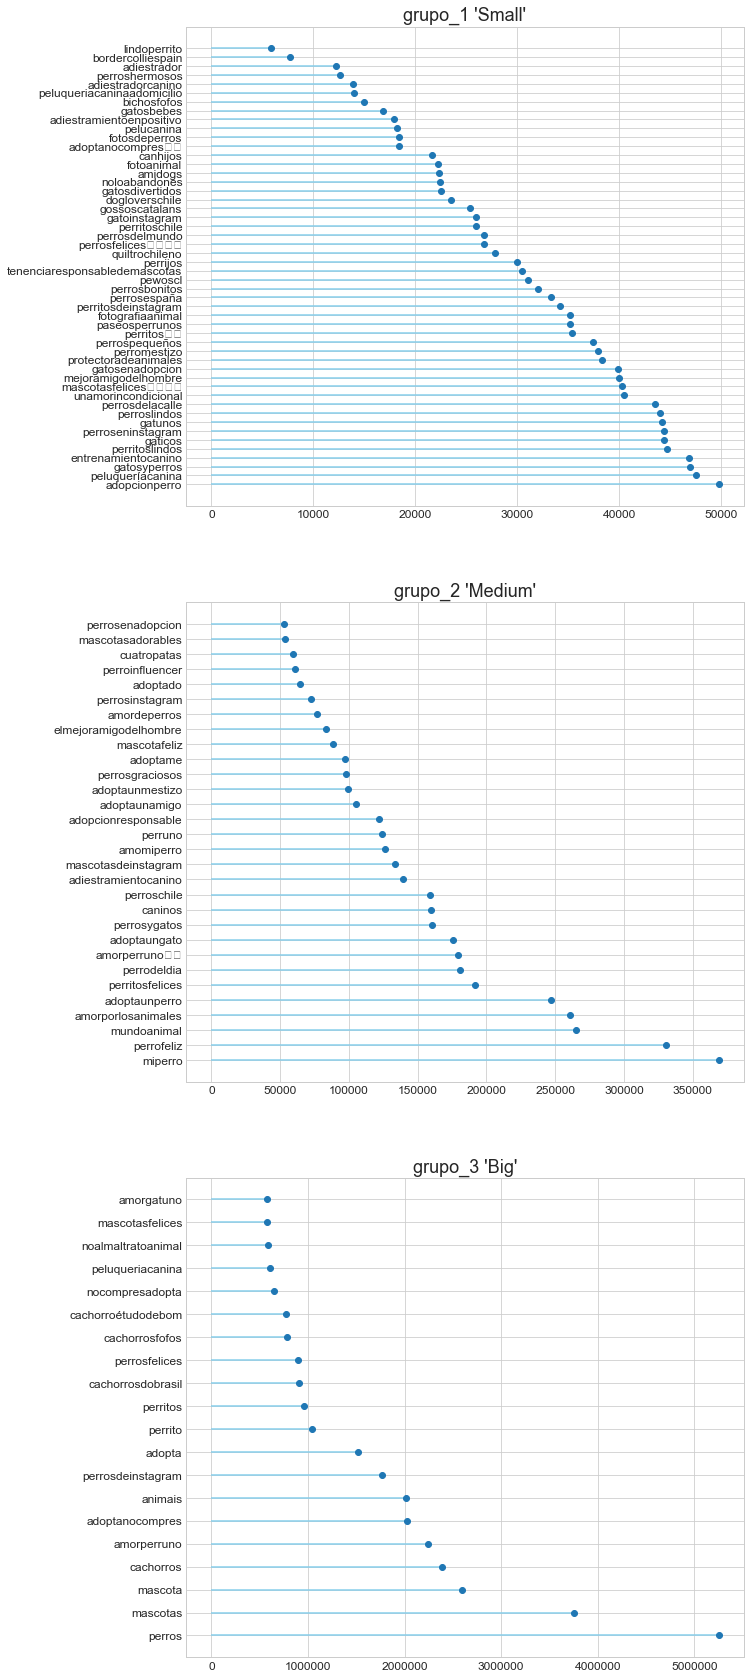

In [67]:
#Ploting Groups
pm.set_plot_style()

fig, axs = plt.subplots(3,1, figsize=(10,30))

#for i, ax in enumerate(axs):

grupo_1 = df[df.group == "small"].sort_values(by='mediacount', ascending=False)
grupo_1.set_index("name", inplace=True)
grupo_2 = df[df.group == "medium"].sort_values(by='mediacount', ascending=False)
grupo_2.set_index("name", inplace=True)
grupo_3 = df[df.group == "big"].sort_values(by='mediacount', ascending=False)
grupo_3.set_index("name", inplace=True)

axs[0].hlines(y=grupo_1.index, xmin=0, xmax=grupo_1['mediacount'], color='skyblue')
axs[0].plot(grupo_1['mediacount'], grupo_1.index, "o")
axs[0].set_title("grupo_1 'Small'")
axs[1].hlines(y=grupo_2.index, xmin=0, xmax=grupo_2['mediacount'], color='skyblue')
axs[1].plot(grupo_2['mediacount'], grupo_2.index, "o")
axs[1].set_title("grupo_2 'Medium'")
axs[2].hlines(y=grupo_3.index, xmin=0, xmax=grupo_3['mediacount'], color='skyblue')
axs[2].plot(grupo_3['mediacount'], grupo_3.index, "o")
axs[2].set_title("grupo_3 'Big'")

plt.show()

## How many hashtags?

In [79]:
#compare number of hashtags with coments + likes
#we must delete len=0. Thera are some accounts that use hashtags in comments
#@widgets.interact(x=(0, 10))
#def f(x=5):
hashtag_count_df = top_posts_df[top_posts_df['hashtag_count'] > 0 ]
hashtag_count_df = hashtag_count_df[hashtag_count_df['hashtag_count'] <= 30]
hashtag_count_df['engagement'] = hashtag_count_df.likes + hashtag_count_df.comments

#create df and plot
hashtag_count_df = hashtag_count_df.groupby('hashtag_count').agg({'likes' : sum, 'comments' : sum})


hashtag_count_df = hashtag_count_df.groupby(pd.cut(hashtag_count_df.index, np.arange(0, 31, 5))).sum()
hashtag_count_df.index = hashtag_count_df.index.astype(str)
#PLOT
hashtag_count_df.plot_bokeh(kind='bar', stacked=True, legend="top_left", title="How many hashtags?", xlabel="Hashtags Intervals", ylabel="Likes+Comments")

Figure(id='5922', ...)

# Lets create a 30 hashtag strategy.

## Working with recent Posts

In [ ]:
#We could randomly select 30 hashtags from what we have right now. But lets see how does they performed lastly.

## Small
One week period


In [80]:
small = df[df.group=='small']
#create DataFrame
small = get_recent_posts(small.hashtag, since=datetime.datetime(2020,6,9), until=datetime.datetime(2020,6,15))
#create date column
#createother columns
small['name'] = small.hashtags.apply(lambda x: x.name)
small['likes'] = small.posts.apply(lambda x: x.likes)
small['comments'] = small.posts.apply(lambda x: x.comments)
small['shortcode'] = small.posts.apply(lambda x: x.shortcode)

|%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%|
0


In [85]:
small.shape

(18159, 7)

In [33]:
small.to_csv("Data/mascotas_small_recent.csv")

In [2]:
#Otra forma
small = pd.read_csv("Data/small_recent.csv").iloc[:,1:]
small['date'] = pd.to_datetime(small.date)
m= pd.crosstab(small.date, small.name).resample('D').sum()

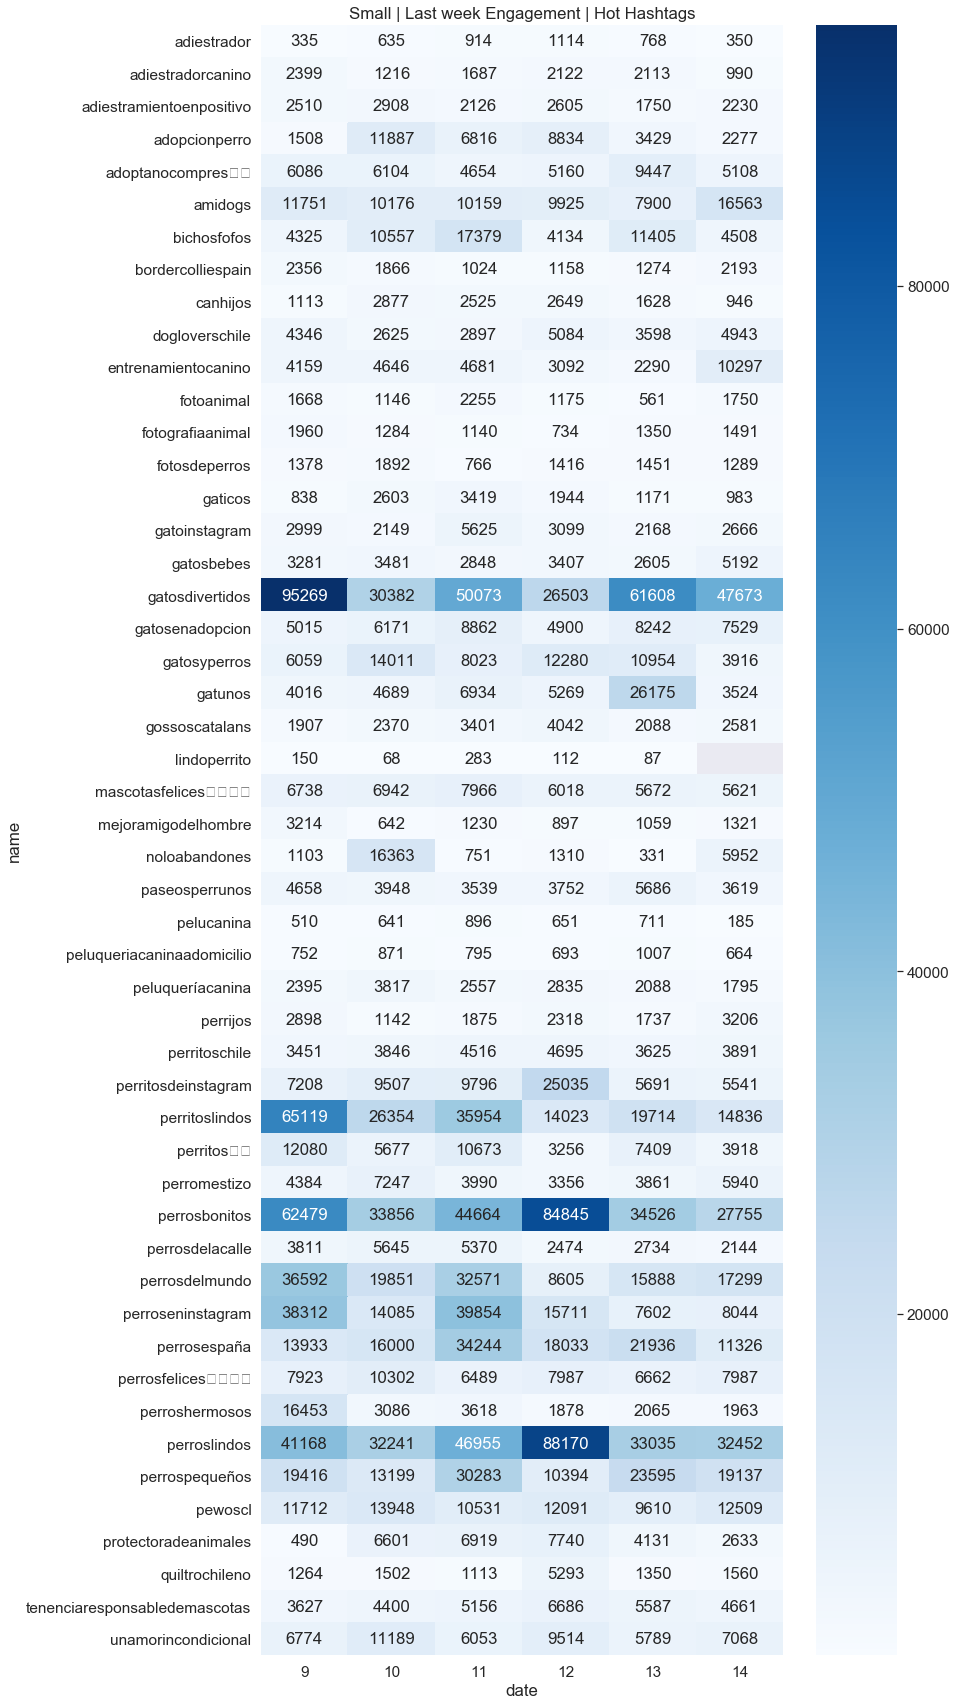

In [139]:
small_df = small[['shortcode', 'name', 'likes', 'comments', 'date']].set_index('date')
small_df['engagement'] = small_df['likes'] + small_df['comments']
splot = small_df.groupby('name').resample('D')['engagement'].sum()
splot = splot.unstack(1)
#plotting
xtiks = [x.day for x in splot.columns]
sns.set(rc={'figure.figsize':(11.7,30)}, font_scale=1.4)
sns.heatmap(
    data=splot, 
    cmap='Blues', 
    annot=True, 
    fmt="2g", 
    xticklabels=xtiks,
    label='big'
    ).set_title("Small | Last week Engagement | Hot Hashtags")
plt.show()

## Mediums
One week period

In [81]:
medium = df[df.group=='medium']
#Create a data Frame
medium = get_recent_posts(medium.hashtag, since=datetime.datetime(2020,6,4), until=datetime.datetime(2020,6,11))
#create date column
#createother columns
medium['name'] = medium.hashtags.apply(lambda x: x.name)
medium['likes'] = medium.posts.apply(lambda x: x.likes)
medium['comments'] = medium.posts.apply(lambda x: x.comments)
medium['shortcode'] = medium.posts.apply(lambda x: x.shortcode)

|%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%|
12


In [86]:
medium.shape

(32021, 7)

In [82]:
medium.to_csv('Data/medium_recent_mascotas.csv')

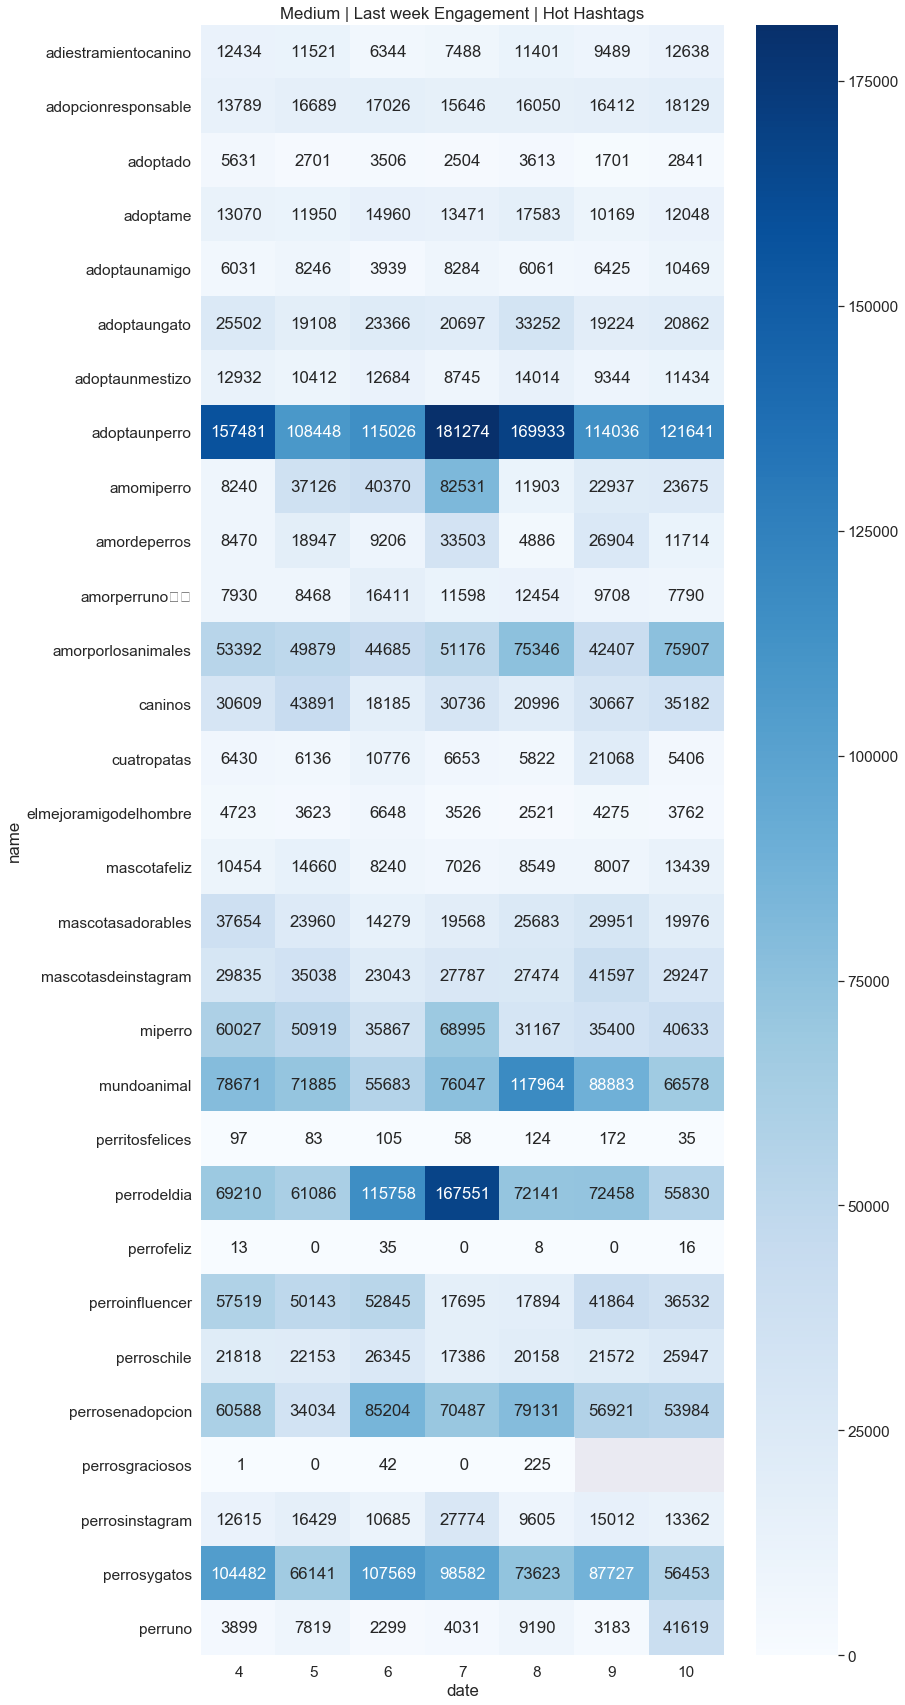

In [138]:
medium_df = medium[['shortcode', 'name', 'likes', 'comments', 'date']].set_index('date')
medium_df['engagement'] = medium_df['likes'] + medium_df['comments']
mplot = medium_df.groupby('name').resample('D')['engagement'].sum()
mplot = mplot.unstack(1)
#plotting
xtiks = [x.day for x in mplot.columns]
sns.set(rc={'figure.figsize':(11.7,30)}, font_scale=1.4)
sns.heatmap(
    data=mplot, 
    cmap='Blues', 
    annot=True, 
    fmt="2g", 
    xticklabels=xtiks,
    label='big'
    ).set_title("Medium | Last week Engagement | Hot Hashtags")
plt.show()

## Bigs
Last hours

In [ ]:
b = df[df.group=='big']
#Create a data Frame
big = get_recent_posts(b.hashtag.tolist(), since=datetime.datetime(2020,6,8), until=datetime.datetime(2020,6,11))
#create date column
#createother columns
big['name'] = big.hashtags.apply(lambda x: x.name)
big['likes'] =big.posts.apply(lambda x: x.likes)
big['comments'] =big.posts.apply(lambda x: x.comments)
big['shortcode'] = big.posts.apply(lambda x: x.shortcode)

In [233]:
big.to_csv("Data/big_recent.csv")

In [297]:
#resample by 2 hour
big.set_index("date").resample("2h").count()

,posts,hashtags,name,likes,comments
date,,,,,
2020-06-10 14:00:00,980,980,980,980,980
2020-06-10 16:00:00,5709,5709,5709,5709,5709
2020-06-10 18:00:00,5882,5882,5882,5882,5882
2020-06-10 20:00:00,5801,5801,5801,5801,5801
2020-06-10 22:00:00,5998,5998,5998,5998,5998
2020-06-11 00:00:00,6005,6005,6005,6005,6005
2020-06-11 02:00:00,4822,4822,4822,4822,4822
2020-06-11 04:00:00,3036,3036,3036,3036,3036
2020-06-11 06:00:00,1367,1367,1367,1367,1367


## Top Influencer of the niche

In [169]:
#Get the top10 repeated posts in top posts.
top10 = top_posts_df.post.value_counts().head(10)
top10_influencers = {}
#get their owners
for p, n in top10.items():
    top10_influencers['@' + p.owner_username] = n

In [170]:
pd.Series(top10_influencers, name='post').plot_bokeh(kind='barh')

Figure(id='7474', ...)

## Most used Words

In [123]:
#First we are going to colect caption from posts
#get all caption(text)
caption_list = []
for x in top_posts_df.post:
    caption_list.append(x.caption)

caption_list = pd.Series(caption_list).dropna()


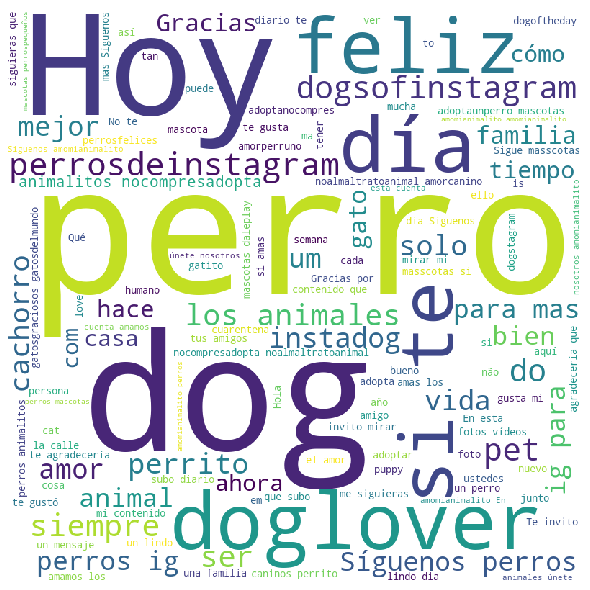

In [124]:
comment_words = '' 
stop_words = set(stopwords.words('spanish'))
  
# iterate through the csv file 
for val in caption_list:
    # typecaste each val to string 
    #val = str(val) 
  
    # split the value 
    tokens = val.split()
      
    # Converts each token into lowercase 
    for w in tokens:
        if w.startswith('#'):
            tokens.remove(w)
            continue
        w = w.lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Media Type to Use

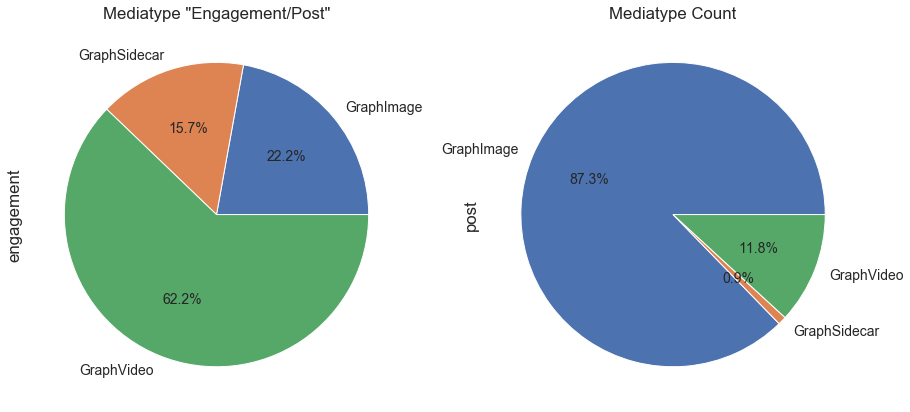

In [125]:
fig, ax = plt.subplots(1,2)
media = top_posts_df[['media_type', 'likes', 'comments', 'post']]
media = media.groupby('media_type').agg({'likes':sum, 'comments':sum, 'post':'count'})
media['engagement'] = (media['likes'] + media ['comments']) / media ['post']

media['engagement'].plot(kind='pie',
    ax=ax[0],
    labels=media.index,
    autopct='%1.1f%%',
    fontsize=14,
    title='Mediatype "Engagement/Post"',
    figsize=(15,8)
    )

media['post'].plot(kind='pie',
    ax=ax[1],
    labels=media.index,
    autopct='%1.1f%%',
    fontsize=14,
    title='Mediatype Count',
    figsize=(15,8)
    )
plt.show()

# Write Strategy

In [54]:
strategy = nicho.write_strategy(number=30)

['bigdataanalytics', 'softwareengineers', 'compsci', 'datascientists', 'expressjs', 'opencv', 'pythondeveloper', 'codeislife', 'artificialintelligenceai', 'datamining', 'datawarehouse', 'machinelearningalgorithms', 'learnprogramming', 'hadoop', 'learncoding', 'deeplearning', 'neuralnetworks', 'datascientist', 'codingdays', 'softwaredevelopment', 'programminglife', 'computervision', 'softwareengineering', 'dataanalytics', 'machinelearning', 'codinglife', 'datascience', 'programmers', 'coding', 'programmer']


In [14]:
for s in strategy:
    print('#'+s)

#emprendereselcamino
#mujeremprende
#emprendo
#enprendimiento
#emprenderconexito
#emprendersepuede
#emprenderencomunidad
#emprendedoresvenezuela
#emprendiento
#mujeresemprendedoras😊
#emprendedorasonline
#emprendedoresycreativos
#exitoabsoluto
#emprendimientoonline
#emprendemos
#jovenesemprendedores
#emprendeya
#emprendedoresunidos
#mentalidad
#empredimiento
#soyemprendedor
#soyemprendedora
#jovenemprendedor
#emprendimientofemenino
#emprendimiento
#mujeremprendedora
#motivacion
#éxito
#emprende
#emprendedora


In [2]:
import instaloader
L = instaloader.Instaloader()

1
(<Profile emprenderesliderar (5494507131)>, <generator object Profile.get_posts at 0x000001C84792A2C8>)
2
(<Profile emprenderlibertad (8372790749)>, <generator object Profile.get_posts at 0x000001C84792A8C8>)
3
(<Profile mision_emprender (4757666815)>, <generator object Profile.get_posts at 0x000001C84792A7C8>)
4
(<Profile comoemprender.info (33176797623)>, <generator object Profile.get_posts at 0x000001C84792ADC8>)
5
(<Profile crearyemprender (13028500381)>, <generator object Profile.get_posts at 0x000001C84792A948>)
6
(<Profile creativabusines (18347213877)>, <generator object Profile.get_posts at 0x000001C84792A9C8>)
7
(<Profile emprender_tuespacio (4199094507)>, <generator object Profile.get_posts at 0x000001C84792A048>)
8
(<Profile lerisecretacademy (8928492974)>, <generator object Profile.get_posts at 0x000001C847C11CC8>)
9
(<Profile dulce_imaginativa (45771710)>, <generator object Profile.get_posts at 0x000001C847C11A48>)
10
(<Profile juegaaemprender (11620940944)>, <generator

In [67]:
import instaloader
L = instaloader.Instaloader()
test = instaloader.TopSearchResults(L.context, 'mascota')

<generator object TopSearchResults.get_profiles at 0x000001C84FF1FC48>

['lala']